In [1]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline 
from wordcloud import WordCloud

In [2]:
columns=['comment_english','label']
df = pd.read_excel(r'C:\Users\Hp\TUGAS AKHIR 2\data_youtube.xlsx', usecols=columns)
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head(4000)

,comment_english,label
0,"['bang', 'list', 'tingal', 'waiting', 'telepho...",positive
1,"['region', 'different', 'different', 'price', '']",positive
2,"['nyimak', 'friend', 'success']",negative
3,"['village', '']",positive
4,"['bang', 'waiting', 'verification', 'call', '']",positive
...,...,...
3302,"['cool', 'see', 'video', 'second']",positive
3303,"['signal', 'telkomsel', 'bad', 'region', 'plea...",positive
3304,"['pasuk', 'season', 'rain', 'net', 'telkomsel'...",positive
3305,"['comment', 'read', 'like', 'net', 'telkomsel'...",positive


In [3]:
df['polaritas'] = df.label.map({'positive':1, 'negative':-1})
df

,comment_english,label,polaritas
0,"['bang', 'list', 'tingal', 'waiting', 'telepho...",positive,1.0
1,"['region', 'different', 'different', 'price', '']",positive,1.0
2,"['nyimak', 'friend', 'success']",negative,-1.0
3,"['village', '']",positive,1.0
4,"['bang', 'waiting', 'verification', 'call', '']",positive,1.0
...,...,...,...
3302,"['cool', 'see', 'video', 'second']",positive,1.0
3303,"['signal', 'telkomsel', 'bad', 'region', 'plea...",positive,1.0
3304,"['pasuk', 'season', 'rain', 'net', 'telkomsel'...",positive,1.0
3305,"['comment', 'read', 'like', 'net', 'telkomsel'...",positive,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comment_english  3307 non-null   object 
 1   label            3307 non-null   object 
 2   polaritas        3306 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.6+ KB


In [5]:
df.polaritas = df.polaritas.fillna(1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comment_english  3307 non-null   object 
 1   label            3307 non-null   object 
 2   polaritas        3307 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.6+ KB


In [7]:
x = np.array(df['comment_english'].transpose())
y = df['polaritas']
print (x.shape)
print (y.shape)

(3307,)
(3307,)


In [8]:
#vektorisasi
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)
print(x.shape)

(3307, 4570)


In [9]:
#splitting dataset ke dalam train dan test data (80 : 20)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

print ('\n total data train : ', ytrain.shape)
print ('\n total data test : ', ytest.shape)


 total data train :  (2645,)

 total data test :  (662,)


In [10]:
print(xtrain.shape)
print(ytrain.shape)

(2645, 4570)
(2645,)


In [11]:
#klasifikasi data (80 : 20)
svc = SVC(kernel = "linear")

#memasukkan data training ke dalam klasifikasi SVM
svc = svc.fit(xtrain, ytrain)

#melakukan prediksi dari data test
predicted = svc.predict(xtest)
predicted

array([-1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
       -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1

In [12]:
print(accuracy_score(ytest, predicted))

0.7915407854984894


In [13]:
print(classification_report(ytest, predicted))

              precision    recall  f1-score   support

        -1.0       0.79      0.53      0.64       227
         1.0       0.79      0.93      0.85       435

    accuracy                           0.79       662
   macro avg       0.79      0.73      0.75       662
weighted avg       0.79      0.79      0.78       662



In [14]:
cnf_matrix = metrics.confusion_matrix(ytest, predicted)
cnf_matrix

array([[121, 106],
       [ 32, 403]], dtype=int64)

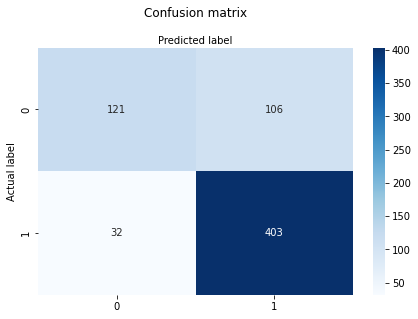

In [15]:
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()